In [46]:
# Use HMMLearn to experiment with the data
# Matrix Pi, A, and B
 

import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm 
from hmmlearn.hmm import MultinomialHMM 
from hmmlearn.hmm import GaussianHMM 
import warnings
import random
import seaborn as sb


#warnings.filterwarnings('ignore')

In [47]:
# inputfile = '../../Data/Columnar Transposition Cipher/text_length_100.txt'

In [48]:
# vigenere cipher: row: key, col plaintext
#
count = 0
cipherText = [] # [12,3,21,23,5....]

# sample.txt: 
# shift cipher
# fdpwpddqzclyjestyrmfeclntyrnlcdtxcfoojwlkjlyotxrpeetyrzytyjplcdterpeddz
# qcfdecletyrmfeespylrltytozyevyzhhsletnzfwooztqtrlgpfaclntyrsldxzddyzdet
# cwtyrgtcefpdtlaacpntlepmplfejzypzqytvtelvscfdsnspgdxzdepye 
# key: 11, reading from line 8977
with open('sampleFromHw2(WorkedData).txt', "r") as txt: 
    for line in txt:
        for e in line:
            if e.isalpha():
                if e.isupper():
                    cipherText.append(ord(e) - 65)
                elif e.islower():
                    cipherText.append(ord(e) - 97)
    
print(cipherText)

[23, 2, 3, 20, 15, 2, 25, 23, 15, 12, 22, 5, 23, 11, 24, 14, 23, 2, 3, 23, 15, 9, 15, 2, 3, 13, 18, 5, 22, 4, 10, 11, 2, 15, 13, 25, 13, 18, 11, 19, 2, 23, 15, 24, 4, 18, 19, 3, 9, 15, 11, 2, 11, 3, 3, 19, 3, 4, 19, 24, 17, 11, 3, 13, 18, 11, 19, 2, 23, 15, 24, 25, 16, 6, 11, 2, 19, 25, 5, 3, 13, 25, 23, 23, 19, 4, 4, 15, 15, 3, 11, 2, 15, 23, 2, 3, 11, 22, 6, 19, 24, 12, 22, 5, 23, 23, 2, 3, 22, 15, 25, 24, 11, 2, 14, 23, 11, 22, 23, 5, 14, 23, 2, 3, 15, 14, 7, 11, 2, 14, 16, 15, 2, 24, 12, 15, 2, 17, 15, 2, 23, 2, 3, 2, 25, 12, 15, 2, 4, 13, 5, 3, 18, 23, 11, 24, 11, 22, 3, 25, 23, 2, 3, 12, 15, 2, 4, 25, 24, 21, 25, 2, 23, 11, 24, 23, 2, 3, 23, 25, 2, 4, 25, 24, 2, 25, 3, 15, 24, 23, 2, 3, 20, 11, 13, 1, 5, 15, 3, 10, 19, 24, 23, 11, 24, 23, 2, 3, 15, 6, 15, 22, 9, 24, 2, 25, 3, 15, 24, 23, 2, 3, 18, 15, 24, 2, 9, 3, 13, 18, 5, 22, 4, 10, 23, 2, 11, 24, 14, 23, 2, 3, 19, 3, 21, 11, 23, 15, 24, 3, 23, 2, 3, 20, 11, 13, 21, 22, 11, 24, 17, 3, 14, 25, 2, 16, 23, 2, 3, 22, 15, 25, 24, 1

In [77]:
# normalize matrix
N = 26
M = 26

pi = []
total = 0
# initialize pi
for i in range(N):
    pi.append(random.uniform(0.035, 0.038)) # double between 0 and 1
    total += pi[i]

#stochastic = 0
for i in range(N):
    pi[i] = pi[i] / total
    #stochastic += pi[i]
print(pi)

[0.03696033720121471, 0.03920233736573844, 0.04002341186542588, 0.0385497714713401, 0.038099904623467365, 0.037332835408552624, 0.03927149586966585, 0.03982316130488193, 0.03710162429085215, 0.039072858393970955, 0.038424893596588024, 0.03792430103721696, 0.03865576843602559, 0.03805071921211007, 0.03761847331839712, 0.039137575369392386, 0.03838946724087655, 0.038716621194239874, 0.03749988643098735, 0.038457098731897066, 0.03760726002188744, 0.03804775475116711, 0.03972559600252571, 0.0386664263785813, 0.03970152133998263, 0.03793889914301494]


In [90]:
total_A = 0
total_B = 0
initial_A = [[0] * N for i in range(N)] # throw 0 into the array first
initial_B = [[0] * M for i in range(N)] # throw 0 into the array first
# initialize A and normalize
for i in range(N):
    for j in range(N):
        initial_A[i][j] = random.uniform(0.035, 0.038)
        total_A += initial_A[i][j]
    for e in range(N):
        initial_A[i][e] =  initial_A[i][e] / total_A
    total_A = 0

# initialize B and normalize
for i in range(N):
    for j in range(M):
        initial_B[i][j] = random.uniform(0.035, 0.038)
        total_B += initial_B[i][j]
    for e in range(M):
        initial_B[i][e] =  initial_B[i][e] / total_B
    total_B = 0

In [91]:
print(initial_A)

[[0.03717947780889677, 0.036575478922889114, 0.03960770679007856, 0.039435970414542235, 0.037189795736632475, 0.037212110746248535, 0.03781296733179966, 0.0395178974189715, 0.03873777470624087, 0.03927024789972688, 0.03885579450694004, 0.03685241203694661, 0.03864425245913462, 0.03952847563619729, 0.03684734250002742, 0.039596634994030704, 0.039669450391560536, 0.03668596973642134, 0.03817648808968592, 0.03833928748525345, 0.03954179737335816, 0.038490114867343224, 0.03916738350111938, 0.038961212300628933, 0.038536492473749136, 0.039567463871576426], [0.03955723526221175, 0.039024052165190844, 0.03673457856566745, 0.037122719429489595, 0.038108392827329834, 0.03935619314867295, 0.03890346744830154, 0.03943511426422945, 0.03958924589858129, 0.03877933013606498, 0.038763921195892524, 0.0374883709029341, 0.0382222801880898, 0.03821697554803974, 0.03855997854298748, 0.03763265728868822, 0.038056728889278926, 0.03962841960318006, 0.03942677612667246, 0.038744374797062435, 0.037414755373241

In [92]:
#print(initial_B)
print(np.shape(np.array(initial_B)))
print('Transpose: ')
print(np.array(initial_B).T)

(26, 26)
Transpose: 
[[ 0.03756032  0.04026238  0.03740356  0.03690022  0.03820534  0.03905714
   0.03918982  0.03907045  0.0394625   0.03770808  0.0377045   0.03918732
   0.03995995  0.0388056   0.03719417  0.03837404  0.03746812  0.03815322
   0.03812551  0.0398913   0.03773609  0.03714977  0.03914365  0.03925735
   0.03865565  0.03974512]
 [ 0.03764476  0.03766821  0.03926937  0.03835456  0.03994143  0.0389
   0.038255    0.03952164  0.0392085   0.03986609  0.03828505  0.03954419
   0.03892444  0.03823546  0.03875418  0.03919185  0.03747028  0.03736924
   0.0380497   0.03920538  0.03713454  0.03920586  0.03716798  0.03915917
   0.03877088  0.04005562]
 [ 0.03960713  0.03950279  0.0395892   0.03951089  0.04005241  0.0370444
   0.03752212  0.03947947  0.03751654  0.03835112  0.03886557  0.03854793
   0.04040398  0.03755919  0.03826529  0.037768    0.0378254   0.03881214
   0.03896717  0.03931591  0.0395206   0.03783469  0.03729677  0.03931347
   0.03877607  0.03929087]
 [ 0.03932575  

In [93]:
# verify if row stochastic
row_sum = 0
for i in range(N):
    for j in range(N):
        row_sum += initial_A[i][j]
    print(row_sum)
    row_sum = 0

0.9999999999999997
1.0
1.0
0.9999999999999997
1.0000000000000002
1.0000000000000002
0.9999999999999999
1.0
1.0000000000000002
1.0
0.9999999999999999
0.9999999999999998
1.0
1.0
0.9999999999999998
0.9999999999999997
1.0000000000000002
1.0
1.0
0.9999999999999999
1.0
1.0000000000000002
1.0000000000000002
1.0000000000000002
0.9999999999999999
0.9999999999999996


In [94]:
row_sum = 0
for i in range(N):
    for j in range(M):
        row_sum += initial_B[i][j]
    print(row_sum)
    row_sum = 0

1.0000000000000002
0.9999999999999999
0.9999999999999999
1.0
1.0
0.9999999999999997
0.9999999999999997
1.0
1.0000000000000002
1.0
1.0
0.9999999999999998
1.0000000000000002
1.0
1.0
0.9999999999999999
1.0000000000000002
0.9999999999999997
1.0
1.0
0.9999999999999997
0.9999999999999999
0.9999999999999999
0.9999999999999998
1.0
0.9999999999999998


In [95]:
# startprob = np.array(pi)
# transmat = np.array(initial_A)
# #emissionprob = np.array(initial_B)

# The requirement follows from the definition of the 
# Multinomial distribution (see https://en.wikipedia.org/wiki/Multinomial_distribution ). 
# If the sample does not conform to it, need to use 
# LabelEncoder from scikit-learn to manually project it 
# to the required range
# from sklearn.preprocessing import LabelEncoder
# cipherText = LabelEncoder().fit_transform(cipherText)

# print(cipherText)
#params='abcdefghijklmnopqrstuvwxyz'
h = hmm.MultinomialHMM(n_components=N, n_iter=500, init_params='abcdefghijklmnopqrstuvwxyz', params='abcdefghijklmnopqrstuvwxyz')
h.emissionprob_ = np.array(initial_B)
h.startprob_ = np.array(pi)
h.transmat_ = np.array(initial_A)

X = np.array(cipherText) # cipherText is the observation 
X = X.reshape(1000,1).T
h.fit(X) # train on the obersvation
# res = h.decode(np.transpose(cipherText))

/Users/gavin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function logsumexp is deprecated; sklearn.utils.extmath.logsumexp was deprecated in version 0.19 and will be removed in 0.21. Use scipy.misc.logsumexp instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/gavin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function logsumexp is deprecated; sklearn.utils.extmath.logsumexp was deprecated in version 0.19 and will be removed in 0.21. Use scipy.misc.logsumexp instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/gavin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function logsumexp is deprecated; sklearn.utils.extmath.logsumexp was deprecated in version 0.19 and will be removed in 0.21. Use scipy.misc.logsumexp instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/gavin/anaconda3/lib/python3.6/site-packages/sklearn

/Users/gavin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function logsumexp is deprecated; sklearn.utils.extmath.logsumexp was deprecated in version 0.19 and will be removed in 0.21. Use scipy.misc.logsumexp instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/gavin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function logsumexp is deprecated; sklearn.utils.extmath.logsumexp was deprecated in version 0.19 and will be removed in 0.21. Use scipy.misc.logsumexp instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/gavin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function logsumexp is deprecated; sklearn.utils.extmath.logsumexp was deprecated in version 0.19 and will be removed in 0.21. Use scipy.misc.logsumexp instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/gavin/anaconda3/lib/python3.6/site-packages/sklearn

/Users/gavin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function logsumexp is deprecated; sklearn.utils.extmath.logsumexp was deprecated in version 0.19 and will be removed in 0.21. Use scipy.misc.logsumexp instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/gavin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function logsumexp is deprecated; sklearn.utils.extmath.logsumexp was deprecated in version 0.19 and will be removed in 0.21. Use scipy.misc.logsumexp instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/gavin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function logsumexp is deprecated; sklearn.utils.extmath.logsumexp was deprecated in version 0.19 and will be removed in 0.21. Use scipy.misc.logsumexp instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/gavin/anaconda3/lib/python3.6/site-packages/sklearn

/Users/gavin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function logsumexp is deprecated; sklearn.utils.extmath.logsumexp was deprecated in version 0.19 and will be removed in 0.21. Use scipy.misc.logsumexp instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/gavin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function logsumexp is deprecated; sklearn.utils.extmath.logsumexp was deprecated in version 0.19 and will be removed in 0.21. Use scipy.misc.logsumexp instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/gavin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function logsumexp is deprecated; sklearn.utils.extmath.logsumexp was deprecated in version 0.19 and will be removed in 0.21. Use scipy.misc.logsumexp instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/gavin/anaconda3/lib/python3.6/site-packages/sklearn

/Users/gavin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function logsumexp is deprecated; sklearn.utils.extmath.logsumexp was deprecated in version 0.19 and will be removed in 0.21. Use scipy.misc.logsumexp instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/gavin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function logsumexp is deprecated; sklearn.utils.extmath.logsumexp was deprecated in version 0.19 and will be removed in 0.21. Use scipy.misc.logsumexp instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/gavin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function logsumexp is deprecated; sklearn.utils.extmath.logsumexp was deprecated in version 0.19 and will be removed in 0.21. Use scipy.misc.logsumexp instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/gavin/anaconda3/lib/python3.6/site-packages/sklearn

MultinomialHMM(algorithm='viterbi', init_params='abcdefghijklmnopqrstuvwxyz',
        n_components=26, n_iter=500, params='abcdefghijklmnopqrstuvwxyz',
        random_state=<mtrand.RandomState object at 0x113913708>,
        startprob=None, startprob_prior=1.0, thresh=0.01, transmat=None,
        transmat_prior=1.0)

In [96]:
# model = hmm.GaussianHMM(n_components=N, covariance_type="full")
# model.startprob_ = np.array(pi)
# model.transmat_ = np.array(initial_A)
# O = np.array(cipherText)
# O = O.reshape(731,1)
# np.shape(O)
# model.fit([O])


In [97]:
# x - 11 = 109 == m
emmision = h.emissionprob_
print(np.shape(emmision.T))
print(emmision.T)


(26, 26)
[[  8.54017711e-18   8.54017711e-18   8.54017711e-18   8.54090627e-18
    8.56217117e-18   8.54017711e-18   8.54017711e-18   8.54017711e-18
    8.63435839e-18   4.31865568e-12   8.54017711e-18   8.54017711e-18
    8.54017711e-18   3.35203760e-03   8.54017711e-18   3.78700673e-03
    8.54017711e-18   8.54017711e-18   8.54017711e-18   8.54017711e-18
    1.39644729e-03   8.54017711e-18   1.44090567e-17   8.54017711e-18
    8.54017712e-18   8.54017711e-18]
 [  8.54017711e-18   8.54017711e-18   8.54017711e-18   8.54017711e-18
    8.54017711e-18   8.54017711e-18   8.54017711e-18   8.54017711e-18
    8.54017711e-18   8.54017711e-18   8.54017711e-18   8.54017711e-18
    8.54017711e-18   8.54017711e-18   9.04355025e-04   8.54017711e-18
    8.54017711e-18   8.54017711e-18   8.54017711e-18   8.54017711e-18
    8.54017711e-18   8.54017711e-18   8.54017711e-18   8.54017711e-18
    8.54017711e-18   8.54017711e-18]
 [  8.54017958e-18   3.73261873e-03   8.54017711e-18   1.08414571e-02
    2.5

In [98]:
# print(h.emissionprob_)

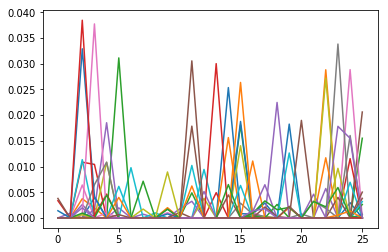

In [99]:
plt.plot(h.emissionprob_.T)
plt.show()

In [88]:
# shift cipher
# fdpwpddqzclyjestyrmfeclntyrnlcdtxcfoojwlkjlyotxrpeetyrzytyjplcdterpeddz
# qcfdecletyrmfeespylrltytozyevyzhhsletnzfwooztqtrlgpfaclntyrsldxzddyzdet
# cwtyrgtcefpdtlaacpntlepmplfejzypzqytvtelvscfdsnspgdxzdepye 
# key: 11, reading from line 8977

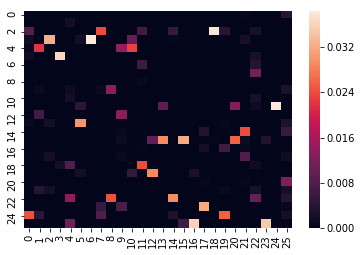

In [89]:
heat_map = sb.heatmap(h.emissionprob_.T)
plt.show()

In [31]:
# print(h.predict(X))

# Try another approach using DataFrame  

In [28]:
print(type(cipherText))
obs = np.array(cipherText)
print(type(obs))

<class 'list'>
<class 'numpy.ndarray'>


In [9]:
import numpy as np
import pandas as pd


In [35]:
obs_map = {'A':0, 'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,'Z':25}
# obs = np.array([1,1,0,1,0,0,1,0,1,1,0,0,0,1])
obs = np.array(cipherText)
print(type(obs))

<class 'numpy.ndarray'>


In [38]:
inv_obs_map = dict((v,k) for k, v in obs_map.items())
obs_seq = [inv_obs_map[v] for v in list(obs)]

print("Simulated Observations:\n",pd.DataFrame(np.column_stack([obs, obs_seq]),columns=['Obs_code', 'Obs_seq']) )

Simulated Observations:
     Obs_code Obs_seq
0         23       X
1          2       C
2          3       D
3         20       U
4         15       P
5          2       C
6         25       Z
7         23       X
8         15       P
9         12       M
10        22       W
11         5       F
12        23       X
13        11       L
14        24       Y
15        14       O
16        23       X
17         2       C
18         3       D
19        23       X
20        15       P
21         9       J
22        15       P
23         2       C
24         3       D
25        13       N
26        18       S
27         5       F
28        22       W
29         4       E
..       ...     ...
970       15       P
971       24       Y
972       14       O
973       19       T
974       24       Y
975       17       R
976        3       D
977       15       P
978        6       G
979       15       P
980        2       C
981       11       L
982       22       W
983        7       H
984      

In [61]:

states = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L','M', 'N', 'O','P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
hidden_states = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L','M', 'N', 'O','P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
state_space = pd.Series(pi, index=hidden_states, name='states')
a_df = pd.DataFrame(columns=hidden_states, index=hidden_states)
# a_df.loc[hidden_states[0]] = initial_A[0]
# a_df.loc[hidden_states[1]] = initial_A[1]
# a_df.loc[hidden_states[2]] = initial_A[2]

for i in range(len(initial_A)):
    a_df.loc[hidden_states[i]] = initial_A[i]
    
print("\n HMM matrix:\n", a_df)
a = a_df.values


 HMM matrix:
            A          B          C          D          E          F  \
A  0.0381593  0.0377124   0.039803  0.0398873  0.0396046  0.0381181   
B  0.0385872   0.039327  0.0393261  0.0381198  0.0396022   0.039542   
C  0.0374403  0.0385146  0.0398668  0.0388468  0.0382523  0.0387702   
D  0.0373626  0.0398237  0.0382714  0.0386124  0.0399641  0.0380255   
E  0.0376386  0.0397928  0.0372711  0.0369207  0.0382802   0.038123   
F  0.0395746  0.0372825  0.0379012  0.0400779  0.0392468  0.0375142   
G  0.0394668  0.0369573  0.0389241  0.0385915  0.0369532  0.0384056   
H  0.0376213  0.0375579  0.0371211  0.0385051  0.0375925  0.0398962   
I  0.0381008  0.0390951  0.0372448  0.0377881  0.0387147  0.0374161   
J  0.0371084  0.0386333  0.0382922  0.0392017  0.0381882  0.0386877   
K  0.0393192  0.0374708  0.0378065  0.0380213  0.0377802  0.0375978   
L  0.0396339  0.0368199  0.0388152  0.0389807  0.0380593  0.0368075   
M  0.0387083  0.0388638  0.0376347  0.0395029  0.0377819   0.0

In [63]:
observable_states = states
b_df = pd.DataFrame(columns=observable_states, index=hidden_states)
# b_df.loc[hidden_states[0]] = [1,0]
# b_df.loc[hidden_states[1]] = [0.8,0.2]
# b_df.loc[hidden_states[2]] = [0.3,0.7]
for i in range(len(initial_B)):
    b_df.loc[hidden_states[i]] = initial_B[i]
print("\n Observable layer  matrix:\n",b_df)
b = np.array(initial_B)


 Observable layer  matrix:
            A          B          C          D          E          F  \
A  0.0377279  0.0383143  0.0384087  0.0386309  0.0393499  0.0402926   
B  0.0379441  0.0378285  0.0391335  0.0385253   0.039384  0.0383002   
C   0.037347  0.0371164  0.0369457  0.0379491  0.0383277  0.0389673   
D  0.0399368  0.0397876  0.0390729   0.036894  0.0390391  0.0396475   
E  0.0397516  0.0395422  0.0377543  0.0369165  0.0389986  0.0390039   
F  0.0376736  0.0397352  0.0374059  0.0372243  0.0376839  0.0377475   
G  0.0372331  0.0381893  0.0372035  0.0382068  0.0393699   0.037294   
H  0.0397638  0.0391823  0.0369115  0.0393698  0.0378856  0.0378358   
I  0.0377967  0.0375123  0.0371674   0.039589  0.0388338  0.0382233   
J  0.0387428  0.0395322   0.038197  0.0377829  0.0379813  0.0400862   
K  0.0372694  0.0396121  0.0370775  0.0376619  0.0385179  0.0391999   
L  0.0379827  0.0385816  0.0375788  0.0371349   0.039992  0.0372576   
M  0.0389611   0.038219  0.0389479  0.0382727  0

In [ ]:
# now define the algorithm
def viterbi(pi, a, b, obs):
    
    nStates = np.shape(b)[0]
    T = np.shape(obs)[0]
    
    # init blank path
    path = path = np.zeros(T,dtype=int)
    # delta --> highest probability of any path that reaches state i
    delta = np.zeros((nStates, T))
    # phi --> argmax by time step for each state
    phi = np.zeros((nStates, T))
    
    # init delta and phi 
    delta[:, 0] = pi * b[:, obs[0]]
    phi[:, 0] = 0

    print('\nStart Walk Forward\n')    
    # the forward algorithm extension
    for t in range(1, T):
        for s in range(nStates):
            delta[s, t] = np.max(delta[:, t-1] * a[:, s]) * b[s, obs[t]] 
            phi[s, t] = np.argmax(delta[:, t-1] * a[:, s])
            #print('s={s} and t={t}: phi[{s}, {t}] = {phi}'.format(s=s, t=t, phi=phi[s, t]))
    
    # find optimal path
    print('-'*50)
    print('Start Backtrace\n')
    path[T-1] = np.argmax(delta[:, T-1])
    for t in range(T-2, -1, -1):
        path[t] = phi[path[t+1], [t+1]]
        #print('path[{}] = {}'.format(t, path[t]))
        
    return path, delta, phi

# now use the algorithm
path, delta, phi = viterbi(pi, a, b, obs)
state_map = {'A':0, 'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,'Z':25}

state_path = [state_map[v] for v in path]
pd.DataFrame().assign(Observation=obs_seq).assign(Best_Path=state_path)